In [77]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [78]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [79]:
# pulasrs     (has binary params in par files, X is yes)
#J0437-4715      X
#J1012+5307      X
#J1024-0719      X
#J1732-5049      X  
#J1910+1256      X 
#J1955+2908      X

In [80]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [81]:
# Posterior PDF from Bailor-Jones et al.

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    NB, r > 0
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans

def gaussian(x, mu, sig):
    """
    a gaussian function
    """
    x = x/1000
    ans = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    return ans

In [82]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J0437-4715 parallax measurements

In [83]:
# Deller et al. 2008
pxD08 = 6.396 
pxD08err = 0.054

In [84]:
# Verbiest et al. timing values, should use straight D_k values.
pxV08 = 6.65   
pxV08err = 0.51

In [85]:
# Dk (pc) from PPTA, Reardon et al. 2016
R16 = 156.79
R16err = 0.25

In [86]:
# Gaia parallax
pxGDR2 = 8.325 - wzp
pxGDR2err = 0.6777

In [87]:
pxGDR2 

8.354

In [88]:
pxmax = 5
pxmin = 11
gx = np.linspace(pxmax, pxmin, 1000)

In [89]:
dx = np.linspace(1000/pxmin, 1000/pxmax,1000)

In [90]:
valGDR2 = []
valD08 = []
valR16 = []

# Gaia
for xx in gx:
    valGDR2.append(sp.stats.norm.pdf(xx, pxGDR2, pxGDR2err))

# D08
for yy in dx:
    valD08.append(sp.stats.norm.pdf(yy, 156.3, 1.3))

# R16, Pb_dot binary orbital period distance estimator
for zz in dx:
    valR16.append(sp.stats.norm.pdf(zz, R16, R16err))

In [91]:
areaT = trapz(valD08, dx) # are curves really normalized to 1?

areaS = simps(valGDR2, dx)

In [92]:
areaS

18.18095262069972

In [93]:
# parallax distance measurement from VLBI observations
d_pi_PTA_0437 = 156.3 
eplus_pi_PTA_0437 = 1.3   # error on this
eminus_pi_PTA_0437 = 1.3   # error on this

# dispersion measure distance from NE 2001, https://www.nrl.navy.mil/rsd/RORF/ne2001/pulsar.cgi
d_DM_NE = 139
eplus_DM_NE = 33
eminus_DM_NE = 29

# YMW 16 DM model, http://www.atnf.csiro.au/research/pulsar/ymw16/
d_DM_YMW = 156.1 # no errors reported here...

In [94]:
x1 = d_pi_PTA_0437
dx1p = x1 + eplus_pi_PTA_0437
dx1m = x1 - eminus_pi_PTA_0437

In [95]:
np.max(valR16)

1.581723257736576

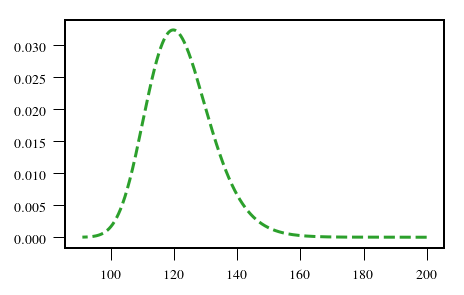

In [96]:
plt.plot(1/gx*1000, np.array(valGDR2)/areaS, label = "Gaia", color = "C2", linestyle='dashed')



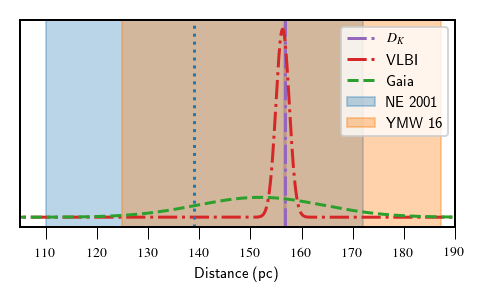

In [97]:
fig, ax1 = plt.subplots()
#plt.plot(dx, np.array(valR16), label = r"$D_K$", color = "C4", linestyle='-.')
plt.axvline(156.79, label = r"$D_K$", color = "C4", linestyle='-.') 
ax1.axvspan(156.79-.25, 156.79+.25, alpha=0.3, color = "C4")



plt.plot(dx, np.array(valD08), label = "VLBI", color = "C3", linestyle ='-.')
plt.plot(dx, np.array(valGDR2)/areaS, label = "Gaia", color = "C2", linestyle='dashed')

# DM NE 2001 model
ax1.axvspan(d_DM_NE - eminus_DM_NE, d_DM_NE+ eplus_DM_NE, alpha=0.3, color = "C0", label = "NE 2001")
plt.axvline(d_DM_NE, ymin=0, ymax=1, color = "C0", linestyle =':')

# DM YMW16 model
ax1.axvspan(d_DM_YMW*.8, d_DM_YMW*1.2, alpha=0.35, color = "C1", label = "YMW 16")
#plt.axvline(d_DM_YMW, ymin=0, ymax=1, color = "C1", linestyle =':')

plt.xlim(105, 190)
plt.yticks([])
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
#plt.savefig("normedDist_0437_final.pdf")

In [111]:
testingPI = np.array(valD08)*np.array(valR16) #gaia data has no effect here
#testingPI = np.array(valD08)*np.array(valR16)*np.array(valGDR2) #gaia data has no effect here


#testingPI = np.array(valGDR2) #gaia data has no effect here

In [112]:
normPI = simps(testingPI, dx)

In [113]:
normPI

0.28140444371635875

In [114]:
normedPInew = np.array(testingPI)/normPI

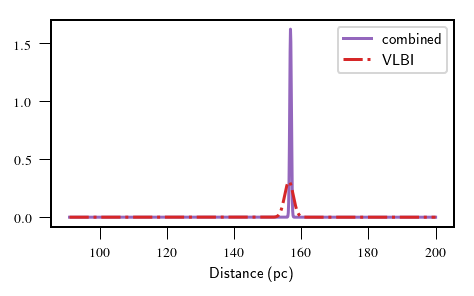

In [115]:
fig, ax1 = plt.subplots()
plt.plot(dx, normedPInew, label = "combined", color = "C4", linestyle='solid')


plt.plot(dx, np.array(valD08),label = "VLBI", color = "C3", linestyle ='-.')
#plt.plot(dx, np.array(valR16), label = r"$D_K$", color = "C1", linestyle='-.')

#plt.yticks([])
#plt.xlim(150,160)
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()

In [116]:
newx = (dx/1000)
newy = (normedPInew)

In [117]:
# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d
    return y

In [118]:
p_initial = [1.0, .157, 0.05, 0.0]

In [119]:
popt, pcov = curve_fit(gauss, newx, newy, p0=p_initial)

In [120]:
y_fit = gauss(newx, *popt)

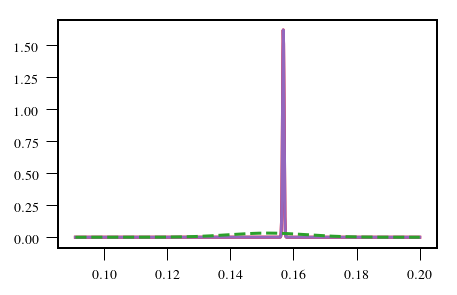

In [121]:
fig, ax = plt.subplots()
ax.plot(newx, y_fit, color = 'red')
plt.plot(dx/1000, newy  , label = "Combined", color = "C4", linestyle='solid')
plt.plot(dx/1000, np.array(valGDR2)/areaS, label = "Gaia", color = "C2", linestyle='dashed')



In [122]:
# mean distance from fit
popt[1]*1000

156.77252496433667

In [123]:
# 1-sigma error on distance fit
popt[2]*1000

0.24550161174402677

In [109]:
# mean distance from fit
popt[1]*1000

156.77058787196506

In [110]:
# 1-sigma error on distance fit
popt[2]*1000

0.24545289769063874

In [34]:
# compare to 156.79 \pm 0.25